In [8]:
import os
HOME = os.getcwd()
print(HOME)

/home/nitro/Studia/Wizja Komputerowa/ProjektV2


In [9]:

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
Setup complete ✅ (16 CPUs, 30.7 GB RAM, 32.6/77.4 GB disk)


In [1]:
! pip install ultralytics==8.0.196

  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_

In [10]:
from ultralytics import YOLO
from IPython.display import display, Image

## Custom Training

In [11]:
#!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="U22b93cUm1F7NFbp9wCj")

project = rf.workspace("poltechnika-gdaska").project("lego_full")
dataset = project.version(1).download("yolov8")




loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to LEGO_full-1 in yolov8:: 100%|██████████| 3156/3156 [00:00<00:00, 13990.80it/s]


In [23]:
!yolo task=detect mode=train model=yolov8s.pt data=LEGO_full-1/data.yaml epochs=500 imgsz=640 plots=True batch = 32 patience = 0

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=LEGO_full-1/data.yaml, epochs=500, patience=0, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript,

In [24]:
!ls {HOME}/runs/detect/train14/

ls: nie ma dostępu do 'Komputerowa/ProjektV2/runs/detect/train14/': Nie ma takiego pliku ani katalogu
/home/nitro/Studia/Wizja:


/home/nitro/Studia/Wizja Komputerowa/ProjektV2


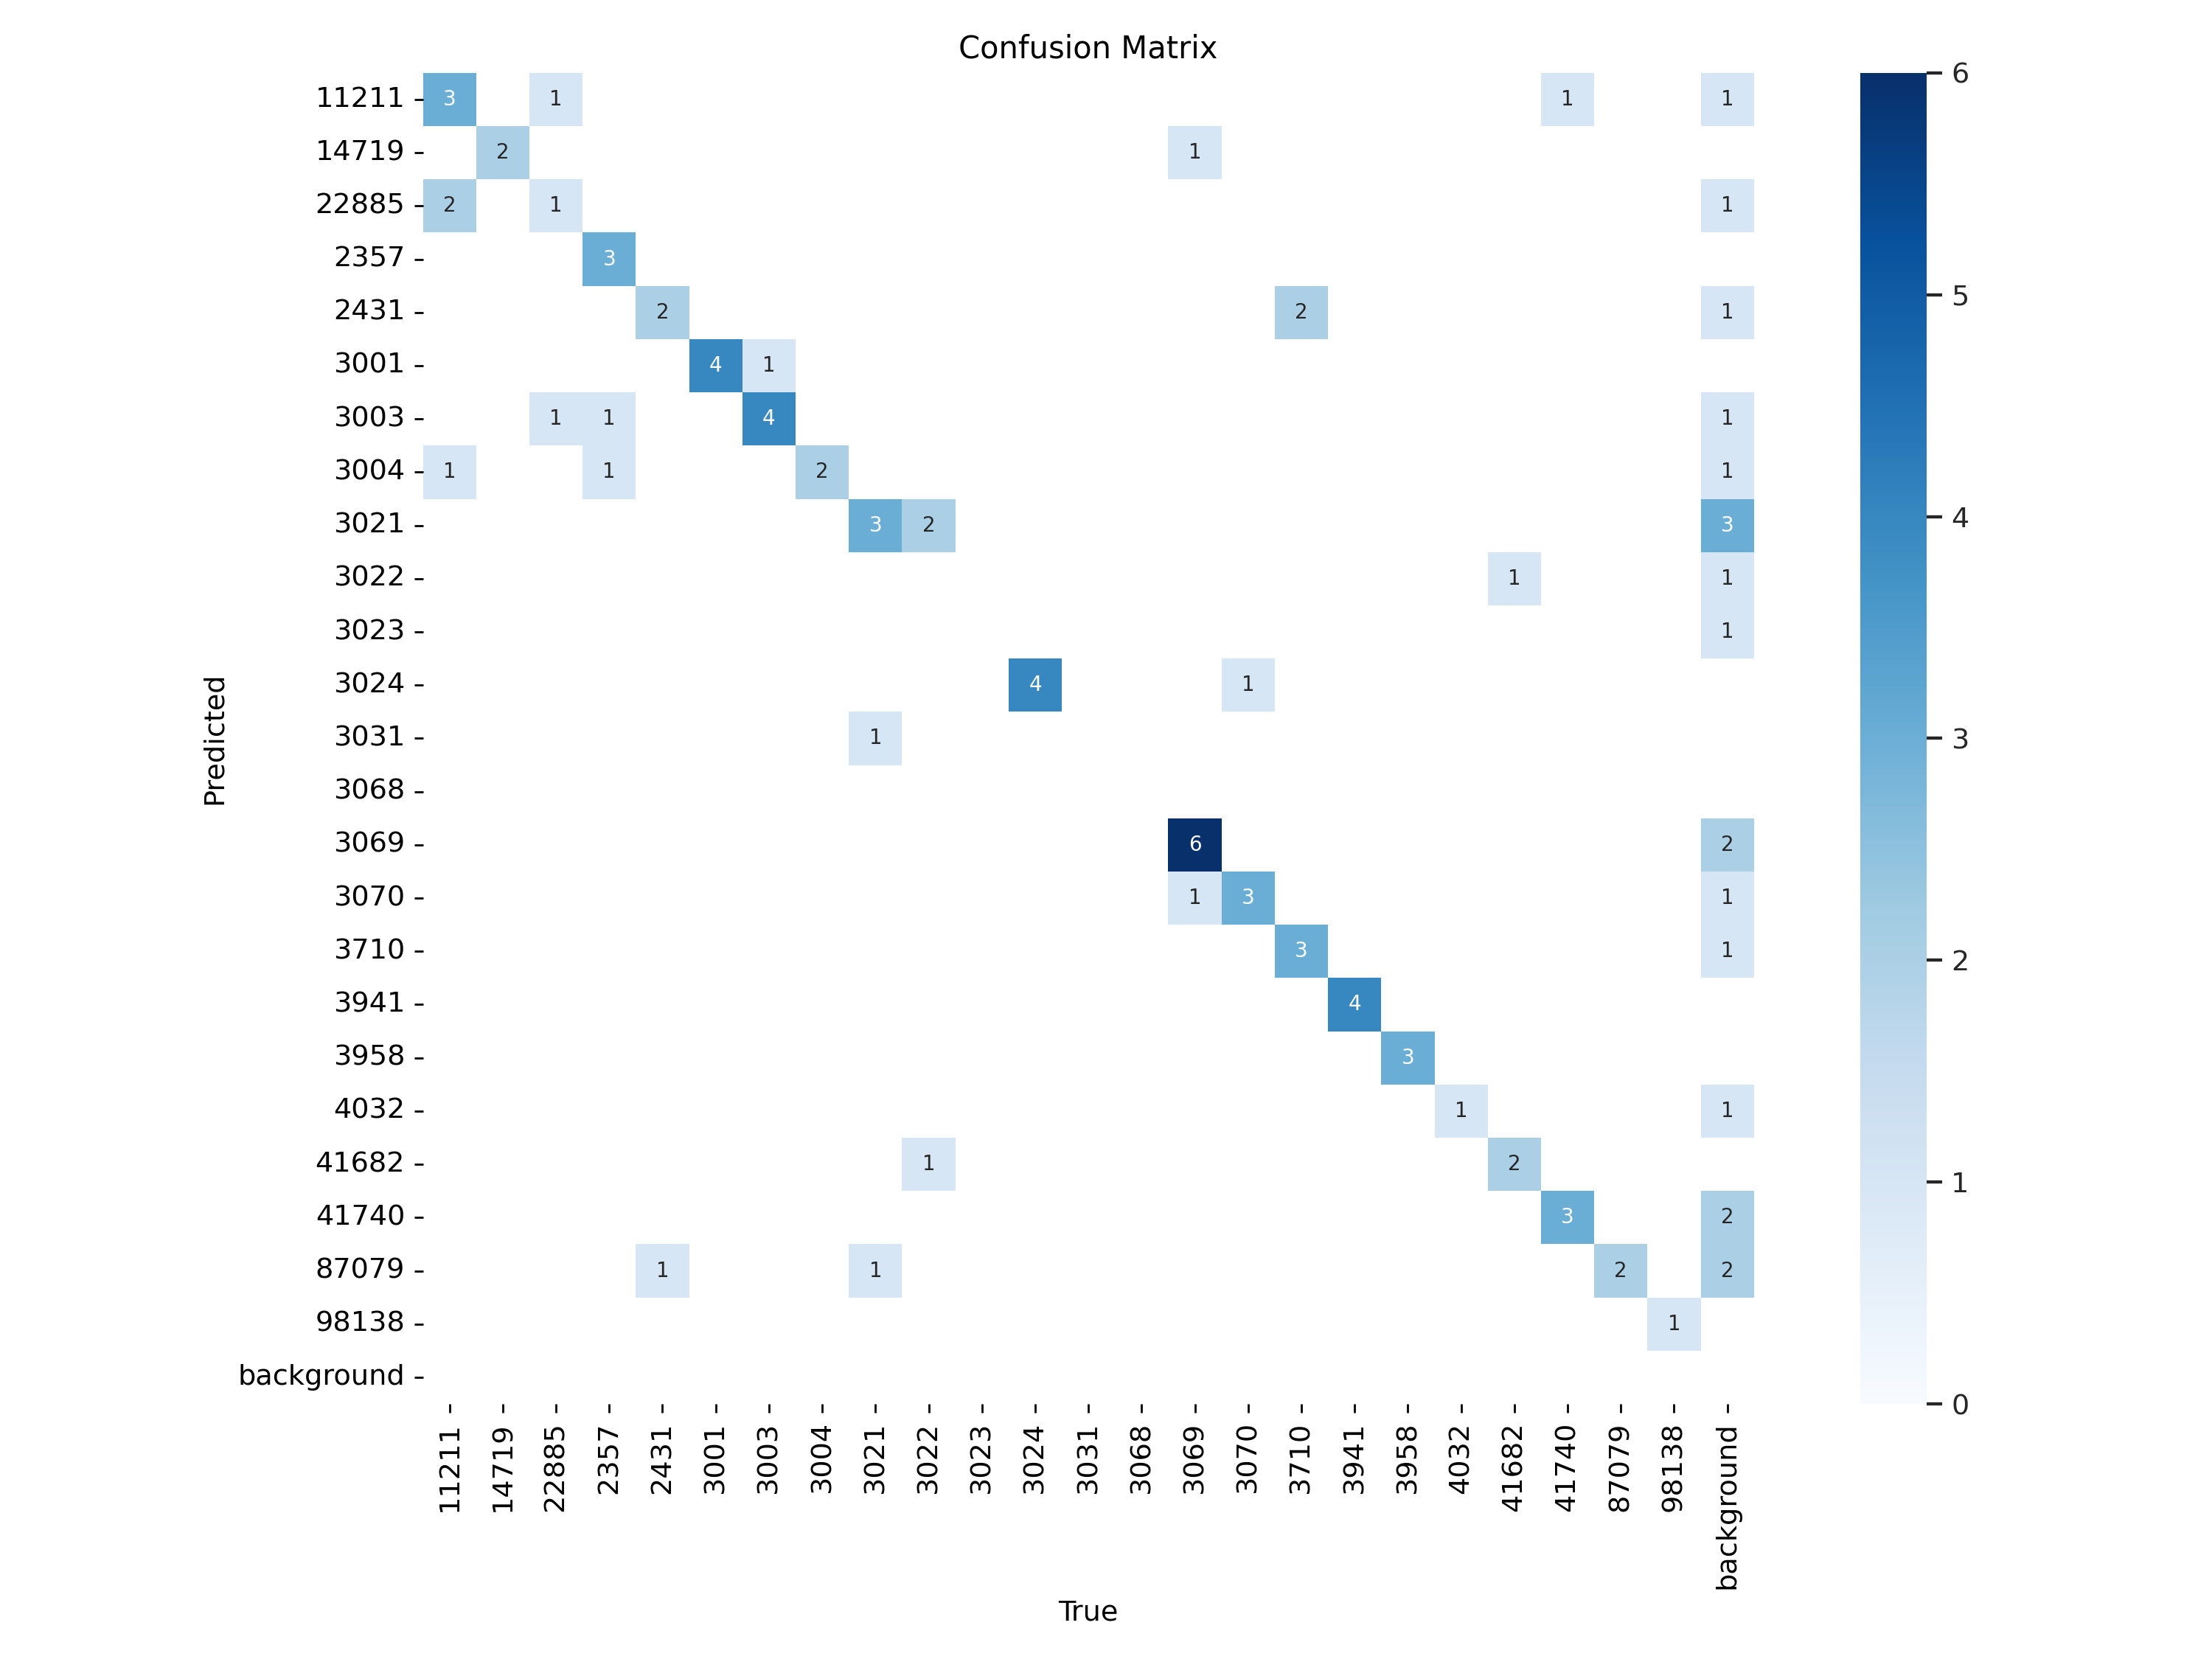

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/confusion_matrix.png', width=600)

/home/nitro/Studia/Wizja Komputerowa/ProjektV2


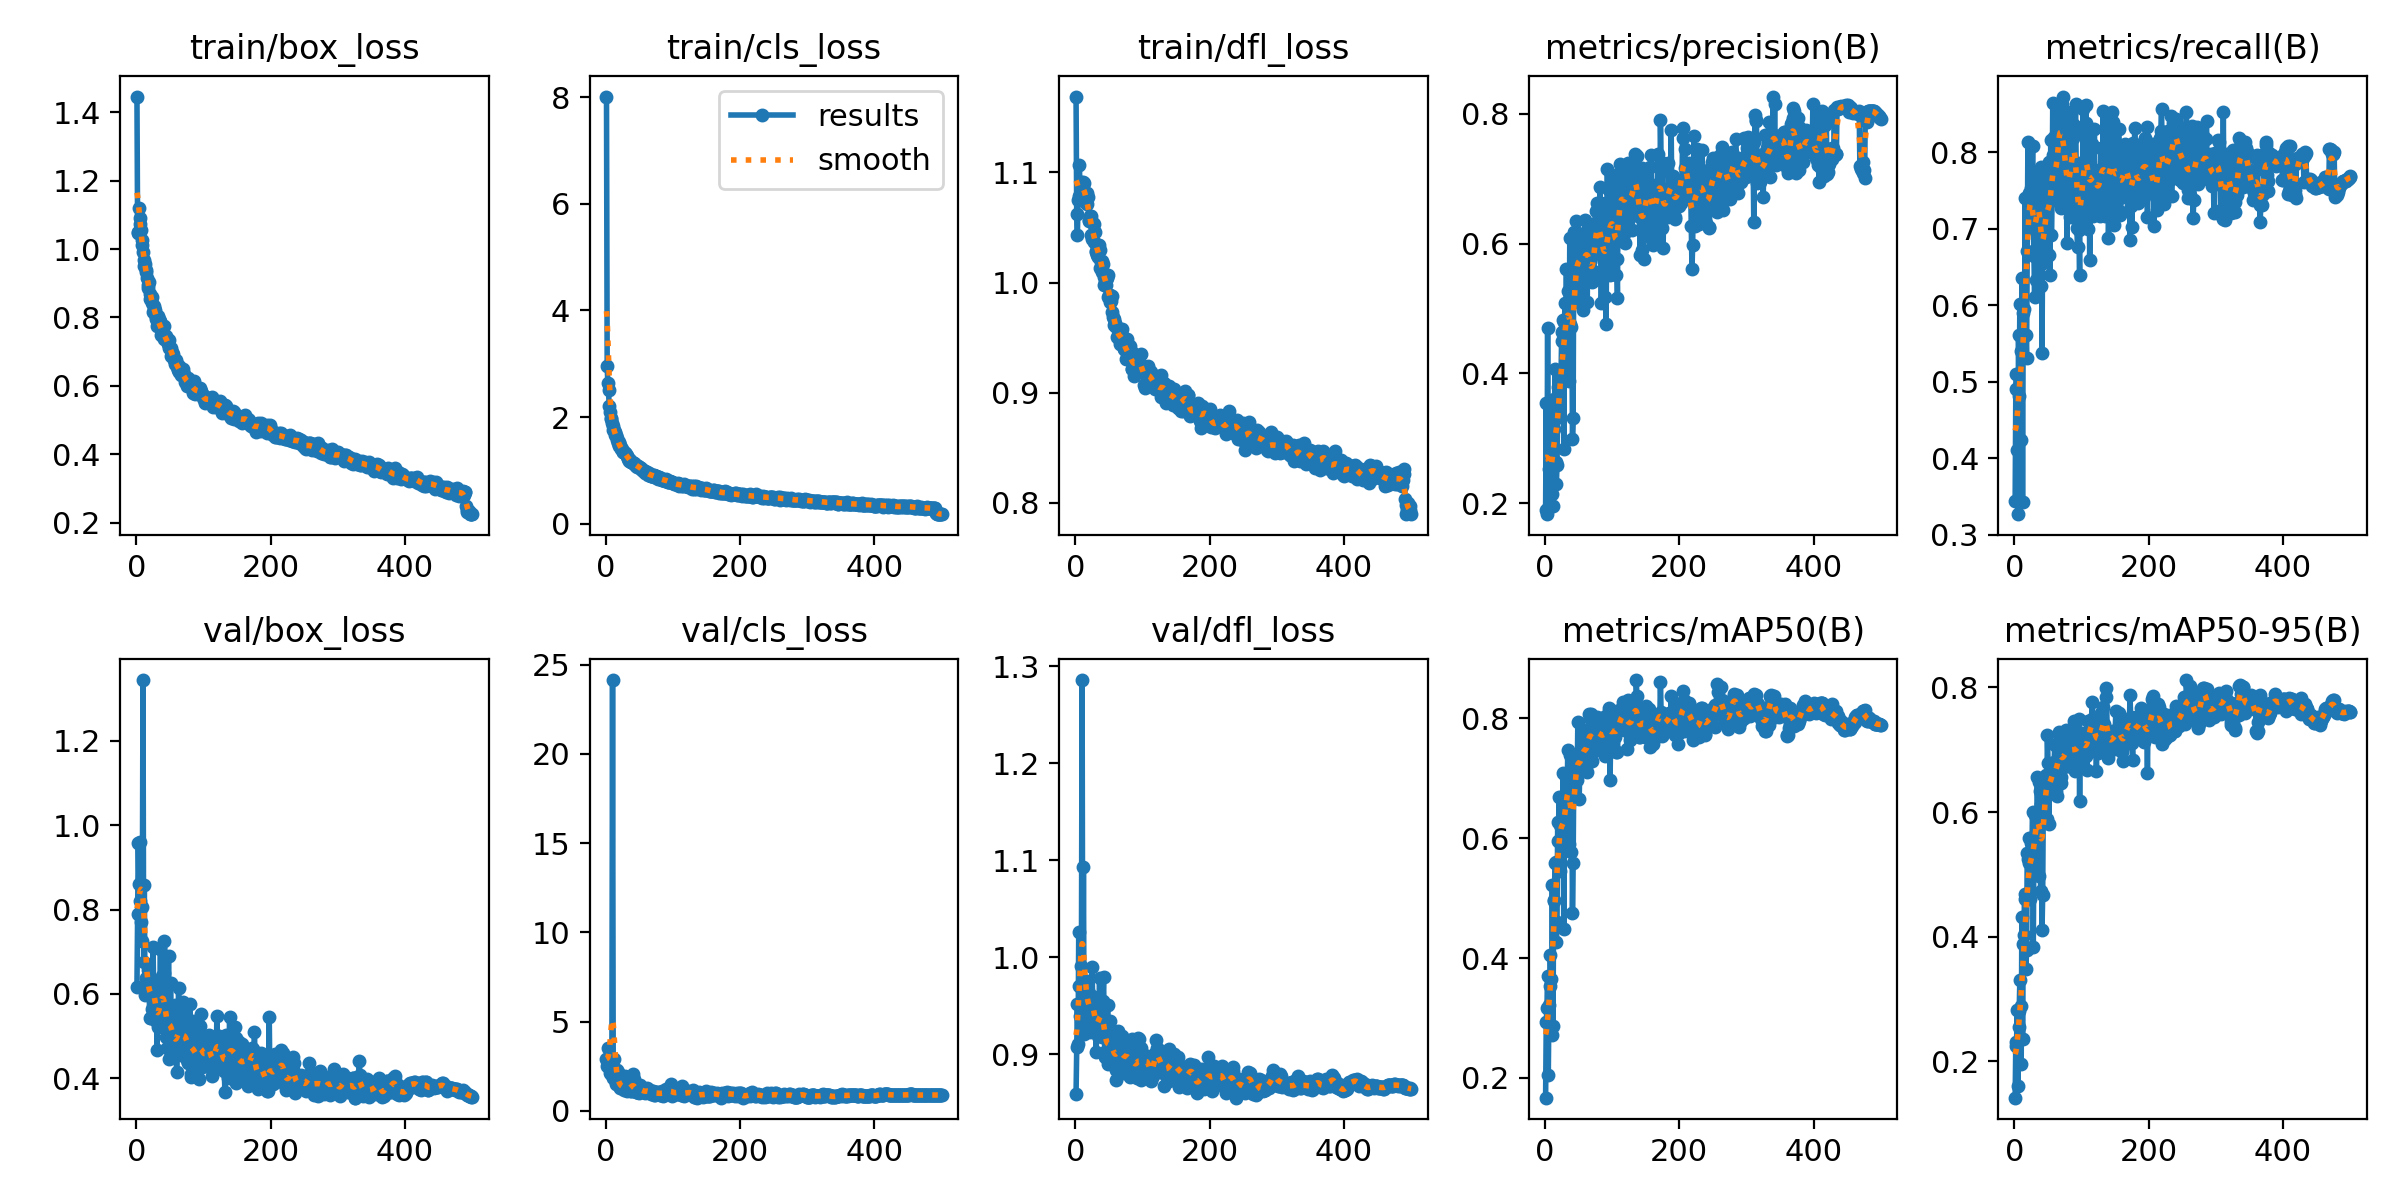

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/results.png', width=600)

/home/nitro/Studia/Wizja Komputerowa/ProjektV2


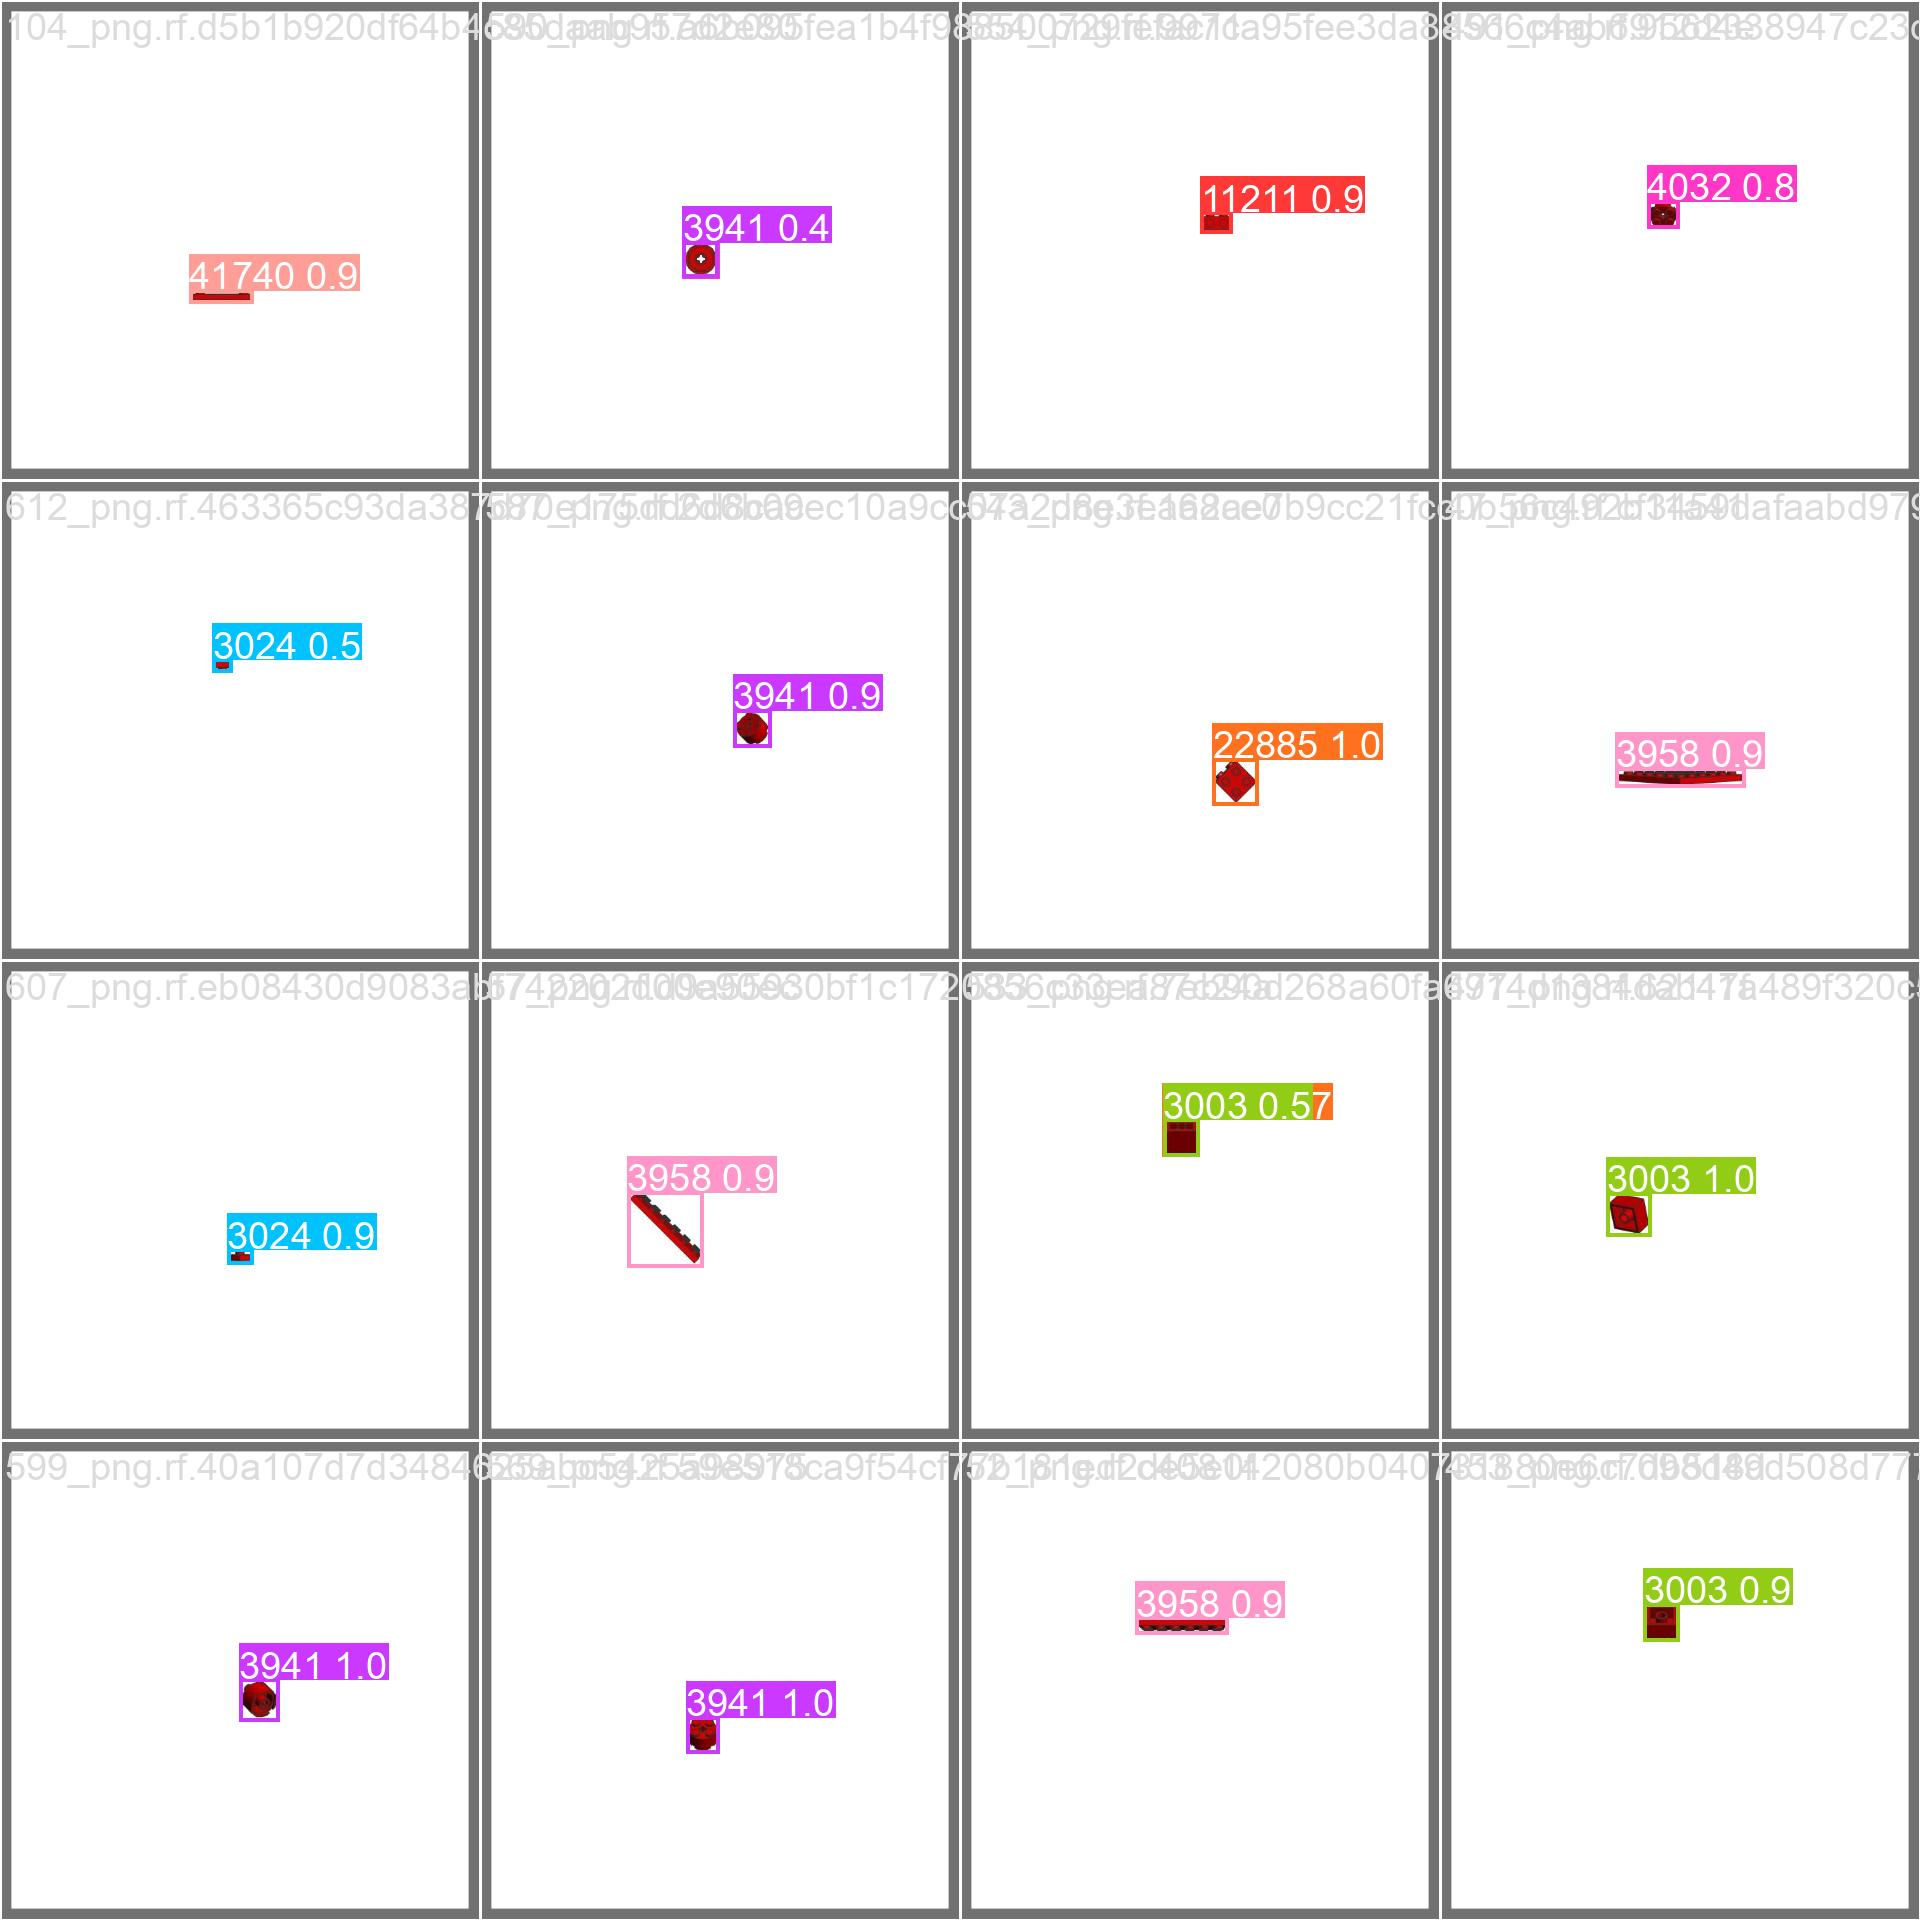

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train14/val_batch0_pred.jpg', width=600)

## Validate Custom Model

## Inference with Custom Model

In [28]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train14/weights/best.pt conf=0.25 source=LEGO_full-1/LEGO_full-1/test/images save=True save_txt=True

/home/nitro/Studia/Wizja Komputerowa/ProjektV2
Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs

image 1/81 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/LEGO_full-1/LEGO_full-1/test/images/113_png.rf.7b8940a7d8dbb410c3a18de85fba390a.jpg: 640x640 1 2431, 1 87079, 8.4ms
image 2/81 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/LEGO_full-1/LEGO_full-1/test/images/115_png.rf.017940c433156fb5fc4e882a27d6d5e2.jpg: 640x640 1 2431, 1 41740, 7.0ms
image 3/81 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/LEGO_full-1/LEGO_full-1/test/images/135_png.rf.56343ed003f63e92f47f27782d37cfbe.jpg: 640x640 1 3024, 7.0ms
image 4/81 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/LEGO_full-1/LEGO_full-1/test/images/142_png.rf.3ae562c5e4fbae1243645cf52fc52f87.jpg: 640x640 1 3070, 7.1ms
image 5/81 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/LEGO_full-1/LEGO_full-1

**NOTE:** Let's take a look at few results.

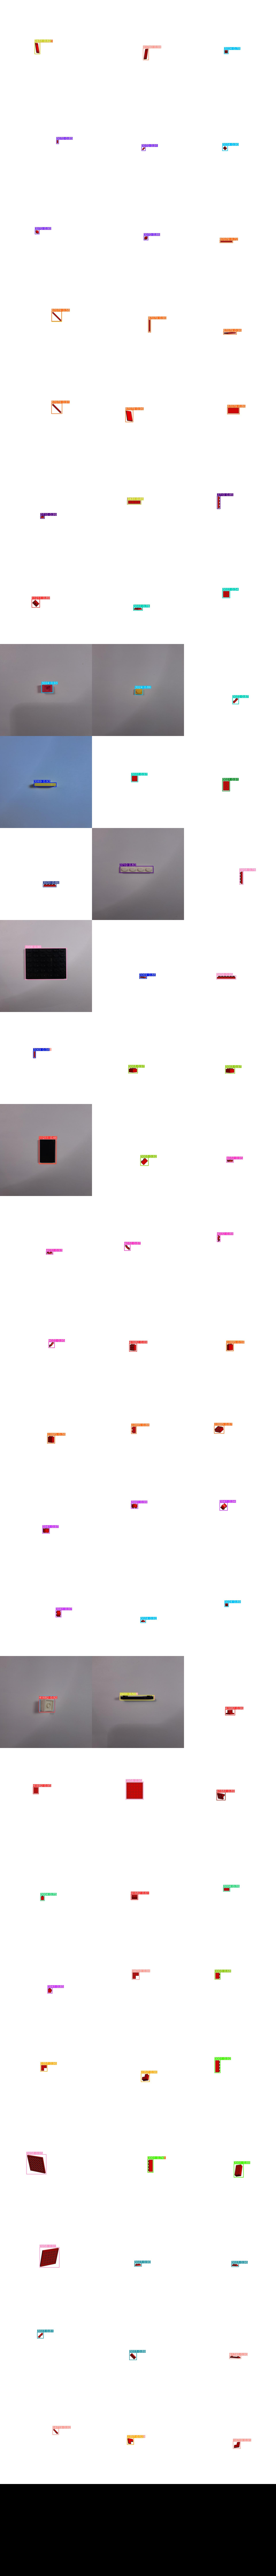

In [29]:
from PIL import Image as PILImage
import glob
from IPython.display import Image, display

folder_path = 'runs/detect/predict11/'
jpg_files = glob.glob(f'{folder_path}*.jpg')
jpg_files.sort()

columns = 3
rows = len(jpg_files) // columns + 1
image_width = 640
image_height = 640

grid_width = columns * image_width
grid_height = rows * image_height

merged_image = PILImage.new('RGB', (grid_width, grid_height))

for i, file_path in enumerate(jpg_files):
    image = PILImage.open(file_path)
    image = image.resize((image_width, image_height))
    row = i // columns
    col = i % columns
    merged_image.paste(image, (col * image_width, row * image_height))

merged_image.save("połączone_zdjęcie2.jpg")
display(Image(filename='połączone_zdjęcie2.jpg', width=600))

In [31]:
import os

def compare_labels(pred_dir, test_dir):
    total_labels = 0
    correct_labels = 0

    for filename in os.listdir(pred_dir):
        if filename.endswith(".txt"):
            pred_file = os.path.join(pred_dir, filename)
            test_file = os.path.join(test_dir, filename)

            with open(pred_file, 'r') as pred, open(test_file, 'r') as test:
                pred_lines = pred.readlines()
                test_lines = test.readlines()

                for pred_line, test_line in zip(pred_lines, test_lines):
                    pred_label = pred_line.split()[0]
                    test_label = test_line.split()[0]

                    total_labels += 1
                    if pred_label == test_label:
                        correct_labels += 1

    accuracy = correct_labels / total_labels
    print(f"Accuracy: {accuracy}")

# Użyj funkcji
compare_labels('runs/detect/predict11/labels', '/home/nitro/Studia/Wizja Komputerowa/ProjektV2/LEGO_full-1/LEGO_full-1/test/labels')

Accuracy: 0.8024691358024691


In [32]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train14/weights/best.pt conf=0.25 source=toPredict save=True save_txt=True

/home/nitro/Studia/Wizja Komputerowa/ProjektV2
Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs

image 1/3 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/toPredict/411257931_743436093989092_469827436680480986_n.jpg: 480x640 1 11211, 7 22885s, 1 2357, 2 3003s, 1 3069, 1 41682, 87.0ms
image 2/3 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/toPredict/411285873_789912789564560_1074260704797066677_n.jpg: 480x640 6 22885s, 1 3022, 2 3031s, 1 41682, 5.9ms
image 3/3 /home/nitro/Studia/Wizja Komputerowa/ProjektV2/toPredict/415773166_897428548669014_4626150203243139544_n.jpg: 640x480 1 11211, 4 22885s, 1 3031, 1 3941, 1 4032, 100.3ms
Speed: 3.1ms preprocess, 64.4ms inference, 94.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict12
3 labels saved to runs/detect/predict12/labels
💡 Learn more at https://docs.ultralytic

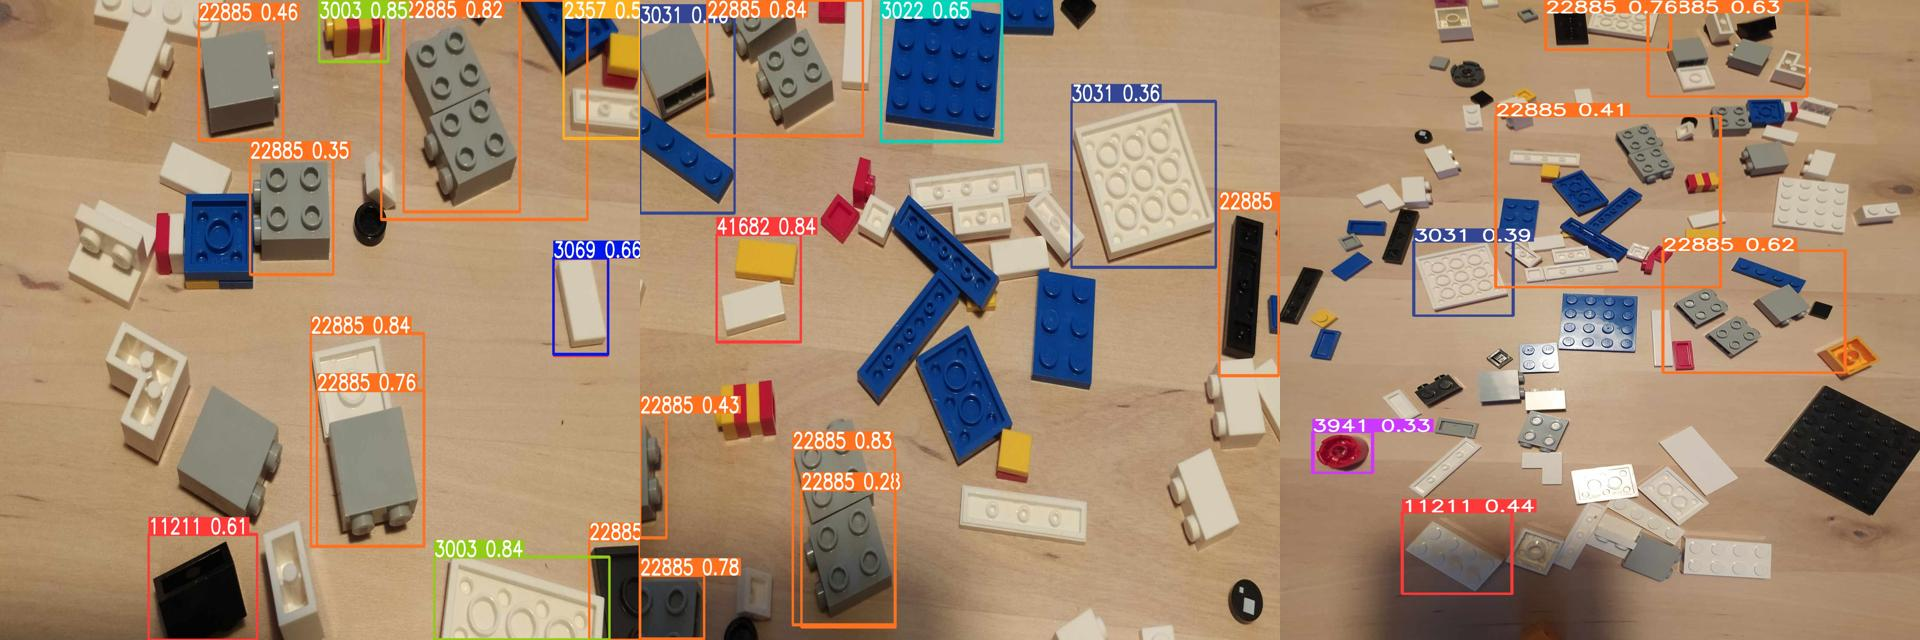

In [35]:
from PIL import Image as PILImage
import glob
from IPython.display import Image, display

folder_path = 'runs/detect/predict12/'
jpg_files = glob.glob(f'{folder_path}*.jpg')
jpg_files.sort()

columns = 3
rows = len(jpg_files) // columns + 1
rows = 1
image_width = 640
image_height = 640

grid_width = columns * image_width
grid_height = rows * image_height

merged_image = PILImage.new('RGB', (grid_width, grid_height))

for i, file_path in enumerate(jpg_files):
    image = PILImage.open(file_path)
    image = image.resize((image_width, image_height))
    row = i // columns
    col = i % columns
    merged_image.paste(image, (col * image_width, row * image_height))

merged_image.save("połączone_zdjęcie2.jpg")
display(Image(filename='połączone_zdjęcie2.jpg', width=600))